This is the data exploration part of the project. This file explores the data in the 'user_info' file, which mainly contains some user idetifiers, textual information, categorical features, and numerical features.
In this file, we mainly explore the distribution of the features which helps us to do feature selection and precessing.

In [ ]:
!pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 10.3 MB/s eta 0:00:00


In [ ]:
import featuretools as ft

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/comp4211/project
%ls

/content/drive/MyDrive/comp4211/project
“COMP4211_proj2.ipynb”的副本  mbti-dataset@          scaler.pkl
image.ipynb                   mbti_labels_multi.csv  sorted_user_info_preprocessed.csv
log_thetas.pkl                project.ipynb          user_info_preprocessing.ipynb


In [ ]:
mbti_labels = pd.read_csv('mbti-dataset/mbti_labels.csv')
mbti_labels

,id,mbti_personality
0,28968838,infp
1,2325006565,infp
2,907848145,infp
3,1330237585,infp
4,97687049,infp
...,...,...
6006,52277872,estj
6007,3061139834,estj
6008,329077476,estj
6009,781835161394614272,estj


In [ ]:
mbti_labels.groupby('mbti_personality').count()

,id
mbti_personality,
enfj,513
enfp,660
entj,516
entp,432
esfj,175
esfp,143
estj,170
estp,97
infj,647


In [ ]:
user_info = pd.read_csv('mbti-dataset/user_info.csv')
user_info

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
1,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
2,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
3,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000
4,97687049,97687049,Freda`,TheFredaLee,London,Arts Psychotherapist/RDMP - CAMHS| Personal De...,False,2872,2172,167,...,189,33,197.0,16.380711,6716.137056,0.071066,0.055838,0.076142,0.959391,0.167513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,52277872,52277872,Cyndi Walsh,loowho11,"San Antonio, Texas",Hill Country Lover. ESTJ. Momma. Wife. Live M...,False,616,836,33,...,33,0,200.0,15.440000,0.335000,0.385000,0.430000,1.115000,0.165000,0.000000
6007,3061139834,3061139834,AF,estjHoran,NaN,Fangirling since 96',False,43,128,0,...,259,2,199.0,17.844221,6.628141,0.025126,1.291457,0.000000,1.301508,0.010050
6008,329077476,329077476,Michael K Williams,Williams_ESTJ,NaN,Football coach,False,103,115,0,...,98,8,109.0,13.504587,40.119266,0.110092,0.422018,0.110092,0.899083,0.073394
6009,781835161394614272,781835161394614272,EstudiantinaStj2016,EStj2016,"Neuquén, Argentina",Ya llega la mejor estudiantina del Santa Teres...,False,49,119,0,...,12,26,74.0,14.675676,3.202703,1.500000,0.391892,0.108108,0.162162,0.351351


In [ ]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6011 non-null   int64  
 1   id_str                        6011 non-null   int64  
 2   name                          6010 non-null   object 
 3   screen_name                   6011 non-null   object 
 4   location                      5237 non-null   object 
 5   description                   5983 non-null   object 
 6   verified                      6011 non-null   bool   
 7   followers_count               6011 non-null   int64  
 8   friends_count                 6011 non-null   int64  
 9   listed_count                  6011 non-null   int64  
 10  favourites_count              6011 non-null   int64  
 11  statuses_count                6011 non-null   int64  
 12  number_of_quoted_statuses     6011 non-null   int64  
 13  num

In [ ]:
print(user_info.columns)

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description',
       'verified', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'number_of_quoted_statuses',
       'number_of_retweeted_statuses', 'total_retweet_count',
       'total_favorite_count', 'total_hashtag_count', 'total_url_count',
       'total_mentions_count', 'total_media_count', 'number_of_tweets_scraped',
       'average_tweet_length', 'average_retweet_count',
       'average_favorite_count', 'average_hashtag_count', 'average_url_count',
       'average_mentions_count', 'average_media_count'],
      dtype='object')


In [ ]:
def get_types(mbti):

    E = 0; N = 0
    F = 0; J = 0

    if mbti[0] == 'I' or mbti[0] == 'i': E = 1
    elif mbti[0] == 'E' or mbti[0] == 'e': E = 0
    else: print('I-E not found')

    if mbti[1] == 'N' or mbti[1] == 'n': N = 0
    elif mbti[1] == 'S' or mbti[1] == 's': N = 1
    else: print('N-S not found')

    if mbti[2] == 'T' or mbti[2] == 't': F = 1
    elif mbti[2] == 'F' or mbti[2] == 'f': F = 0
    else: print('T-F not found')

    if mbti[3] == 'J' or mbti[3] == 'j': J = 0
    elif mbti[3] == 'P' or mbti[3] == 'p': J = 1
    else: print('J-P not found')
    return pd.Series( {'E/I':E, 'N/S':N , 'F/T': F, 'J/P': J })


In [ ]:
print(get_types('ESFP'))

E/I    0
N/S    1
F/T    0
J/P    1
dtype: int64


In [ ]:
mbti_labels = mbti_labels.join(mbti_labels['mbti_personality'].apply(get_types))
mbti_labels.head(5)

,id,mbti_personality,E/I,N/S,F/T,J/P
0,28968838,infp,1,0,0,1
1,2325006565,infp,1,0,0,1
2,907848145,infp,1,0,0,1
3,1330237585,infp,1,0,0,1
4,97687049,infp,1,0,0,1


In [ ]:
mbti_labels.to_csv('mbti_labels_multi.csv', index=False)


In [ ]:
labels = ['E/I', 'N/S', 'F/T', 'J/P']

In [ ]:
df = user_info.join(mbti_labels[['mbti_personality',*labels]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6011 non-null   int64  
 1   id_str                        6011 non-null   int64  
 2   name                          6010 non-null   object 
 3   screen_name                   6011 non-null   object 
 4   location                      5237 non-null   object 
 5   description                   5983 non-null   object 
 6   verified                      6011 non-null   bool   
 7   followers_count               6011 non-null   int64  
 8   friends_count                 6011 non-null   int64  
 9   listed_count                  6011 non-null   int64  
 10  favourites_count              6011 non-null   int64  
 11  statuses_count                6011 non-null   int64  
 12  number_of_quoted_statuses     6011 non-null   int64  
 13  num

In [ ]:
categorical_features = ['verified']

In [ ]:
numerical_features = user_info.columns[7:28].to_list()
numerical_features

['followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'number_of_quoted_statuses',
 'number_of_retweeted_statuses',
 'total_retweet_count',
 'total_favorite_count',
 'total_hashtag_count',
 'total_url_count',
 'total_mentions_count',
 'total_media_count',
 'number_of_tweets_scraped',
 'average_tweet_length',
 'average_retweet_count',
 'average_favorite_count',
 'average_hashtag_count',
 'average_url_count',
 'average_mentions_count',
 'average_media_count']

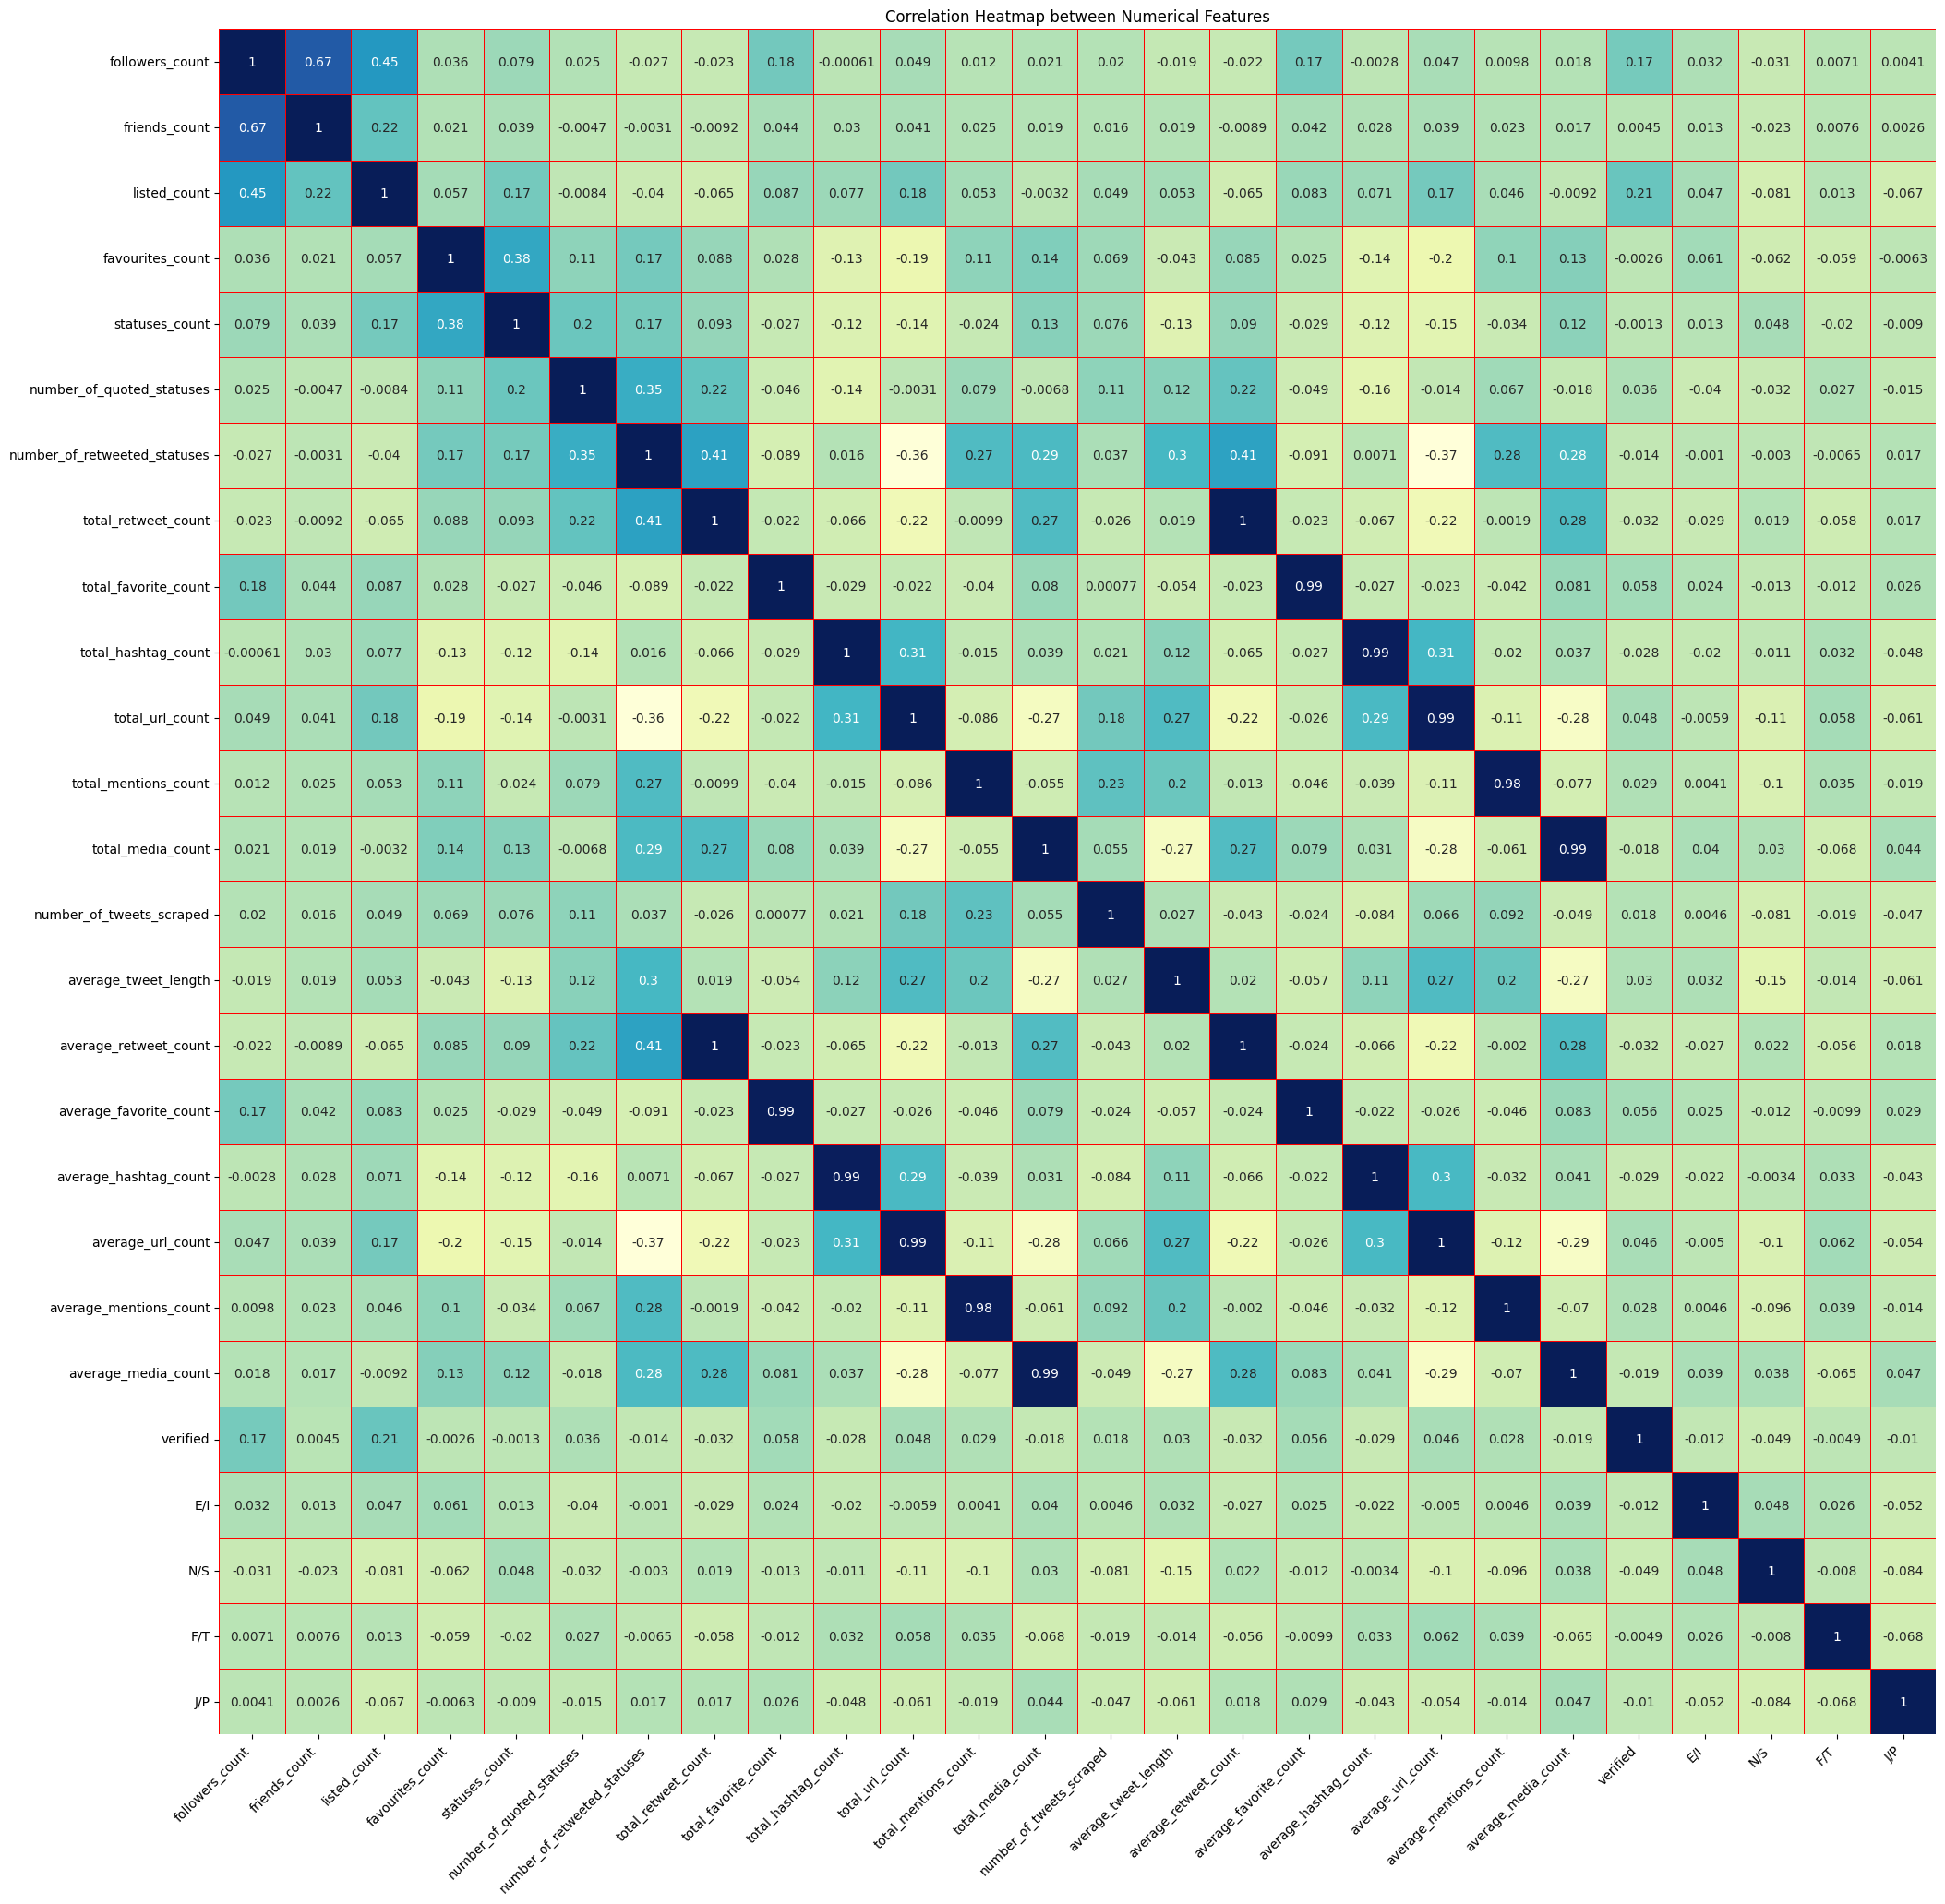

In [ ]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(df[numerical_features+categorical_features+labels].corr(), annot=True, cmap='YlGnBu', linecolor='r', linewidths=0.5, fmt='.2g', cbar=False)
plt.title('Correlation Heatmap between Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
mi_scores = []
for i in range(len(labels)):
    mi = mutual_info_classif(df[numerical_features], df[labels[i]])
    mi_scores.append(mi)

In [ ]:
mi_scores

[array([0.        , 0.00208744, 0.00866396, 0.00832598, 0.00022077,
        0.00070768, 0.00534085, 0.00269853, 0.        , 0.        ,
        0.00542968, 0.0074957 , 0.        , 0.00176369, 0.0009042 ,
        0.        , 0.00874061, 0.        , 0.0023602 , 0.00245975,
        0.0101012 ]),
 array([0.00947027, 0.01801931, 0.02685518, 0.01588129, 0.00648481,
        0.        , 0.00626969, 0.        , 0.01219739, 0.        ,
        0.01510155, 0.00896735, 0.        , 0.01655487, 0.02068405,
        0.00351408, 0.02271759, 0.        , 0.01277162, 0.00199034,
        0.        ]),
 array([4.32095604e-03, 0.00000000e+00, 0.00000000e+00, 7.61784325e-03,
        0.00000000e+00, 0.00000000e+00, 5.10469171e-03, 0.00000000e+00,
        6.69082727e-03, 2.69801155e-05, 5.30914207e-04, 2.37087772e-04,
        4.45386494e-04, 0.00000000e+00, 2.32685300e-03, 0.00000000e+00,
        9.71904578e-03, 3.12811453e-03, 6.09393430e-03, 0.00000000e+00,
        5.87053490e-03]),
 array([0.00270443, 0.0014

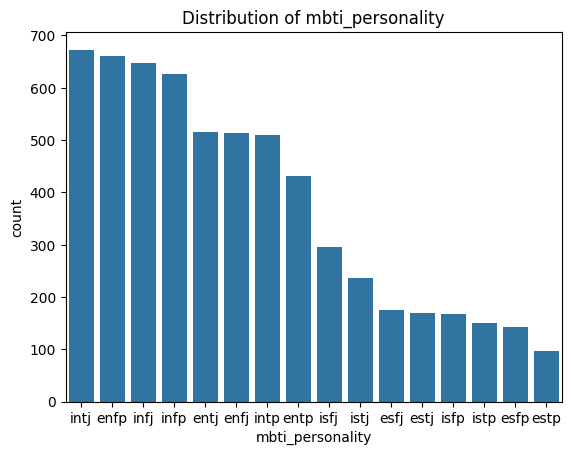

In [ ]:
sns.countplot(x='mbti_personality', data=df, order=df['mbti_personality'].value_counts().index)
plt.title('Distribution of mbti_personality')
plt.show()

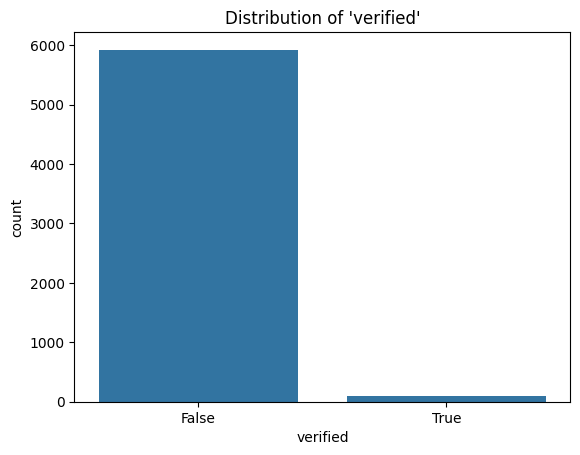

In [ ]:
sns.countplot(x='verified', data=df)
plt.title(f"Distribution of 'verified'")
plt.show()

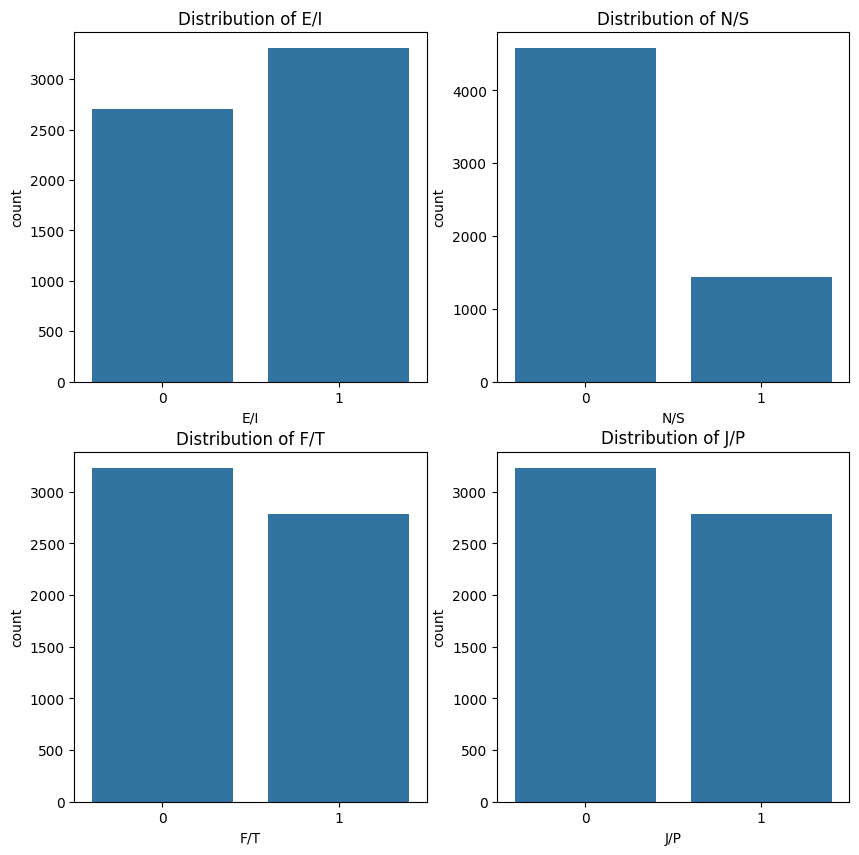

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(x=labels[i], data=df)
    plt.title(f'Distribution of {labels[i]}')
plt.show()

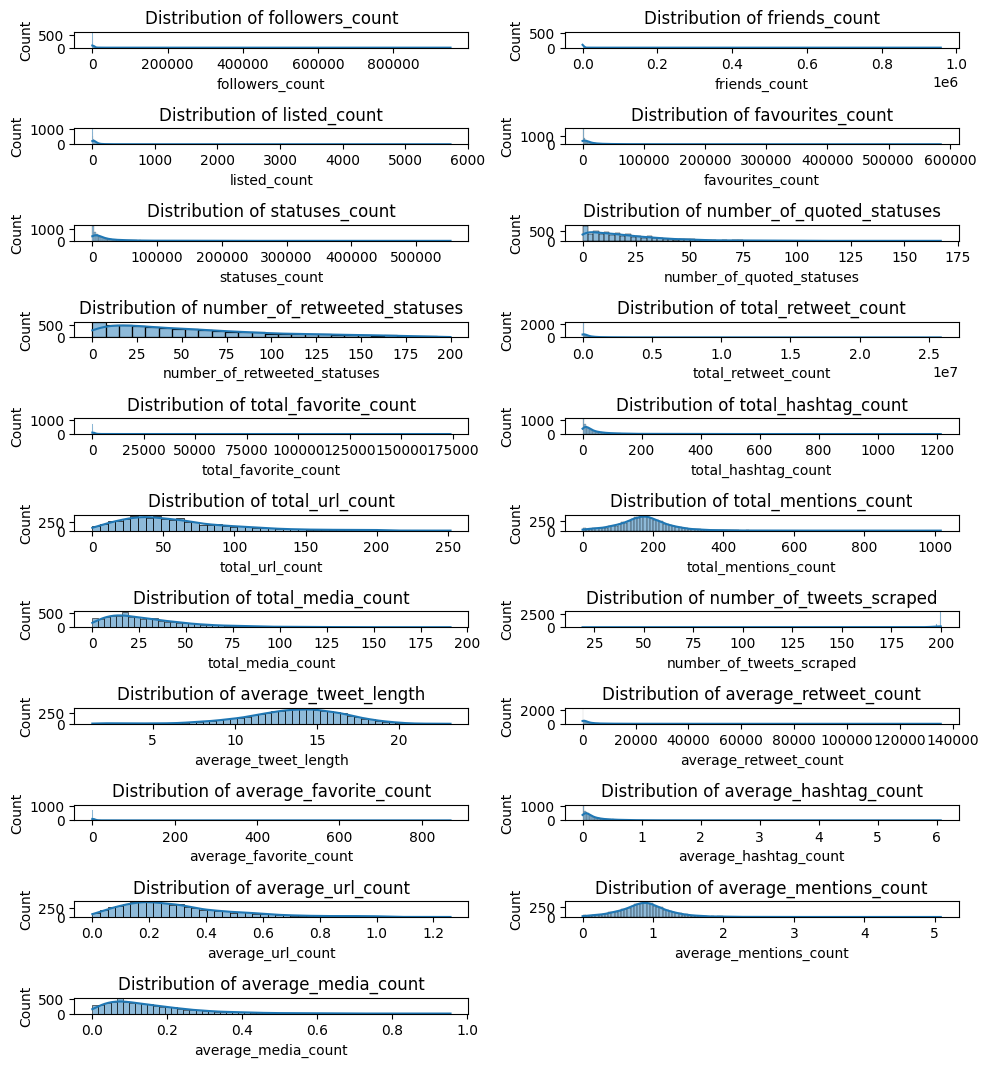

In [ ]:
numerical_columns = df[numerical_features].columns

plt.figure(figsize=(10, 20))

# Loop over the numerical columns to create subplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
numerical_features_selected = ['followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'number_of_quoted_statuses',
 'number_of_retweeted_statuses',
 'number_of_tweets_scraped',
 'average_tweet_length',
 'average_retweet_count',
 'average_favorite_count',
 'average_hashtag_count',
 'average_url_count',
 'average_mentions_count',
 'average_media_count']

In [ ]:
df = df[numerical_features_selected+labels]

In [ ]:
es = ft.EntitySet(id="social_media")
es = es.add_dataframe(dataframe_name="user_data",
                              dataframe=df,
                              index="id")

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, dataframe_name
  warnings.warn(


In [ ]:
es

Entityset: social_media
  DataFrames:
    data [Rows: 6011, Columns: 16]
  Relationships:
    No relationships

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="data",
                                      agg_primitives=["mean", "sum", "mode"],
                                      trans_primitives=["multiply_numeric"],
                                      max_depth=2)

/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['mean', 'mode', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


In [ ]:
feature_matrix

,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,number_of_tweets_scraped,average_tweet_length,average_retweet_count,...,listed_count * number_of_quoted_statuses,listed_count * number_of_retweeted_statuses,listed_count * number_of_tweets_scraped,listed_count * statuses_count,number_of_quoted_statuses * number_of_retweeted_statuses,number_of_quoted_statuses * number_of_tweets_scraped,number_of_quoted_statuses * statuses_count,number_of_retweeted_statuses * number_of_tweets_scraped,number_of_retweeted_statuses * statuses_count,number_of_tweets_scraped * statuses_count
id,,,,,,,,,,,,,,,,,,,,,
28968838,14135,1338,47,103794,358901,23,113,200.0,16.150000,3718.745000,...,1081.0,5311.0,9400.0,16868347.0,2599.0,4600.0,8254723.0,22600.0,40555813.0,71780200.0
2325006565,1223,604,31,178178,312384,17,93,199.0,9.668342,3722.211055,...,527.0,2883.0,6169.0,9683904.0,1581.0,3383.0,5310528.0,18507.0,29051712.0,62164416.0
907848145,8512,312,147,40136,282995,24,135,192.0,14.718750,10028.718750,...,3528.0,19845.0,28224.0,41600265.0,3240.0,4608.0,6791880.0,25920.0,38204325.0,54335040.0
1330237585,1805,340,69,151521,244181,2,68,200.0,7.655000,827.370000,...,138.0,4692.0,13800.0,16848489.0,136.0,400.0,488362.0,13600.0,16604308.0,48836200.0
97687049,2872,2172,167,252943,237098,35,156,197.0,16.380711,6716.137056,...,5845.0,26052.0,32899.0,39595366.0,5460.0,6895.0,8298430.0,30732.0,36987288.0,46708306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52277872,616,836,33,59,311,1,11,200.0,15.440000,0.335000,...,33.0,363.0,6600.0,10263.0,11.0,200.0,311.0,2200.0,3421.0,62200.0
3061139834,43,128,0,6,245,0,5,199.0,17.844221,6.628141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995.0,1225.0,48755.0
329077476,103,115,0,45,112,4,16,109.0,13.504587,40.119266,...,0.0,0.0,0.0,0.0,64.0,436.0,448.0,1744.0,1792.0,12208.0


In [ ]:
df

,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count,IE,NS,TF,JP
0,9.556416,7.199006,3.852273,11.550164,12.790813,3.139833,4.728272,5.307773,2.790029,8.221142,0.527978,-0.890379,-1.534794,-0.247821,-1.769020,1,1,0,0
1,7.109144,6.403740,3.437208,12.090539,12.652001,2.839078,4.533674,5.302807,2.282366,8.222073,-0.192832,-1.029225,-1.627195,-0.156921,-1.601941,1,1,0,0
2,9.049244,5.743324,4.991113,10.600031,12.553198,3.182212,4.906015,5.267343,2.698017,9.213208,0.423005,-0.912444,-2.034787,-0.097889,-0.912444,1,1,0,0
3,7.498371,5.829240,4.235555,11.928480,12.405681,0.741937,4.220977,5.307773,2.052391,6.718253,0.784130,-2.519498,-2.891372,-0.453343,-0.702188,1,1,0,0
4,7.962799,7.683450,5.118592,12.440920,12.376245,3.558201,5.050497,5.292802,2.804100,8.812268,-2.637135,-2.876394,-2.568608,-0.040936,-1.783716,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,6.423409,6.728748,3.499533,4.079231,5.752255,0.095310,2.406945,5.307773,2.745442,-1.092133,-0.953214,-0.842808,0.109303,-1.798784,-7.600902,0,0,1,1
6007,3.763523,4.852811,-2.302585,1.808289,5.517051,-2.302585,1.629241,5.302807,2.889022,1.891400,-3.664162,0.256158,-7.600902,0.263907,-4.551606,0,0,1,1
6008,4.635699,4.745801,-2.302585,3.808882,4.752728,1.410987,2.778819,4.708629,2.612720,3.691869,-2.201910,-0.861522,-2.201910,-0.105824,-2.605117,0,0,1,1
6009,3.893859,4.779963,-2.302585,0.741937,4.368181,0.095310,2.839078,4.329417,2.695112,1.164151,0.405798,-0.935494,-2.220009,-1.816080,-1.044546,0,0,1,1


In [ ]:
for i in numerical_features_selected:
    df[i] = np.log(df[i]+np.min(df[i].to_numpy()[np.nonzero(df[i])])/10)

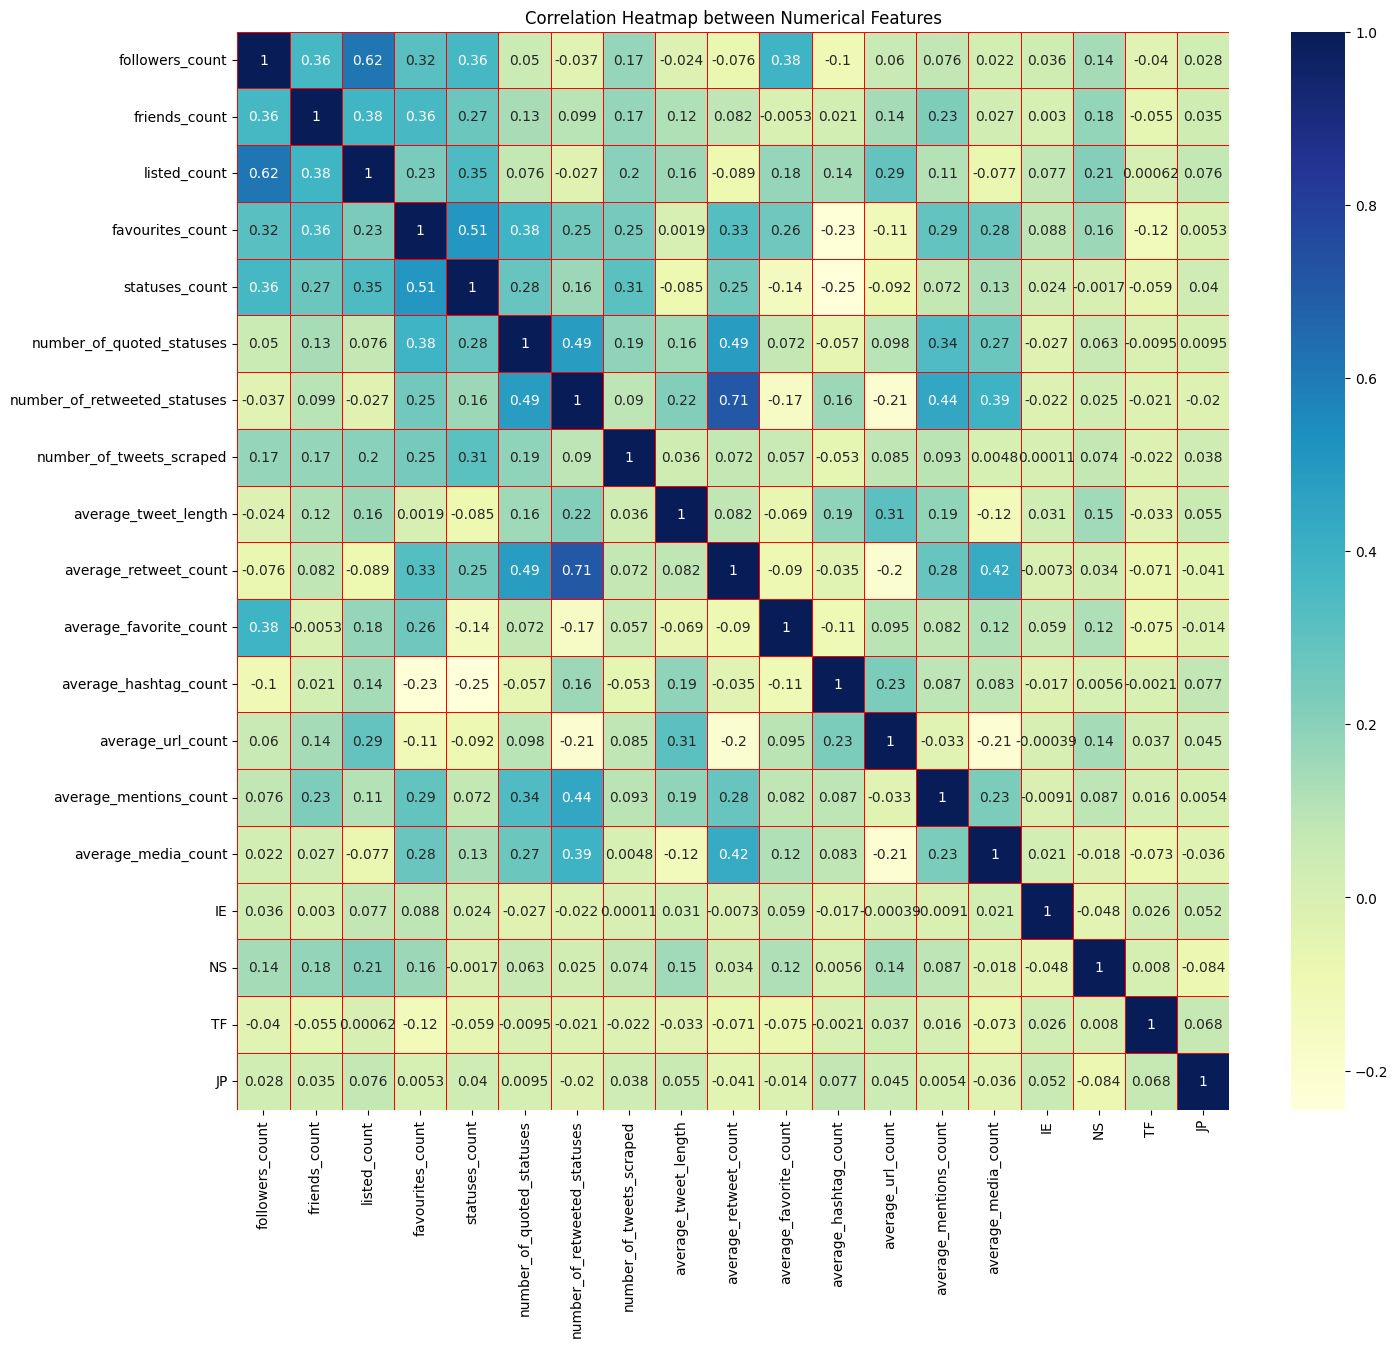

In [ ]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linecolor='r', linewidths=0.5, )
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

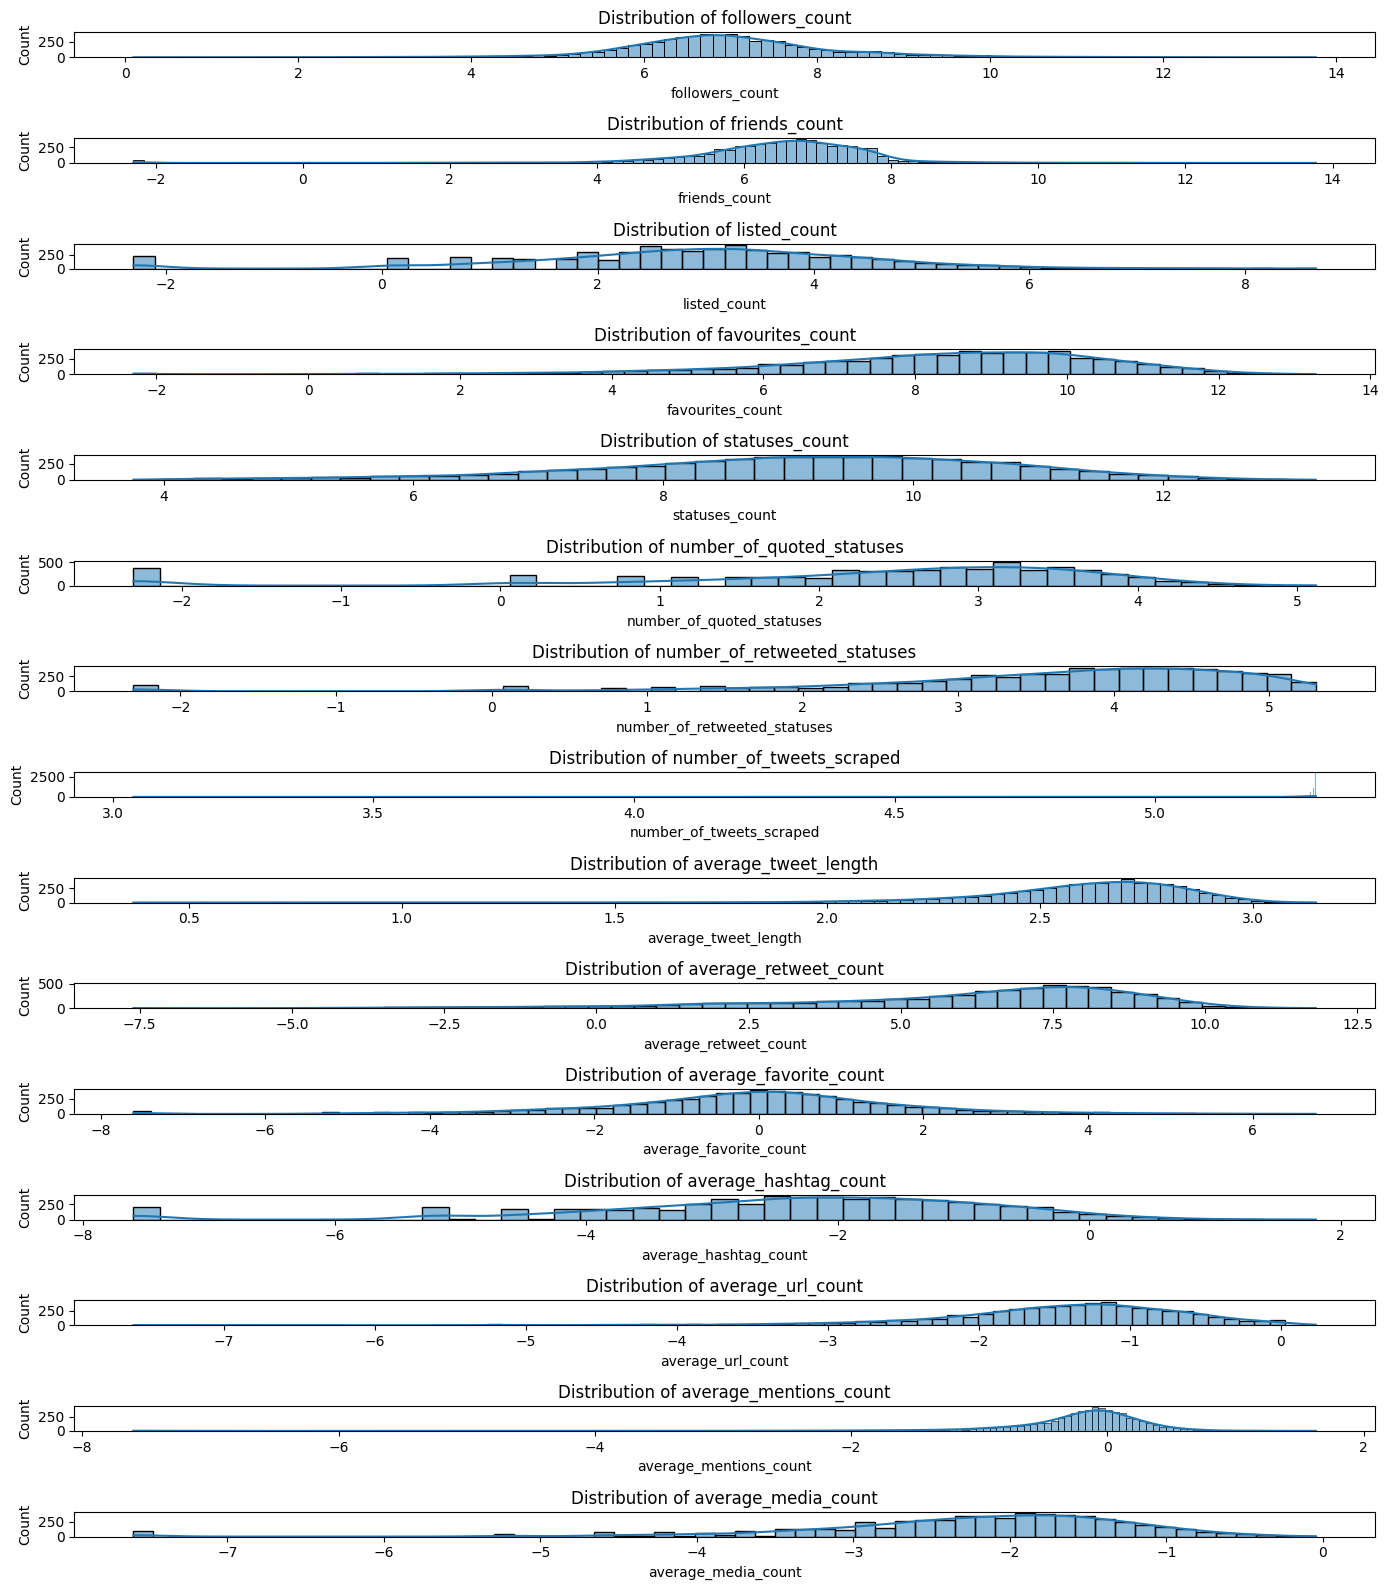

In [ ]:
numerical_columns = df[numerical_features_selected].columns

plt.figure(figsize=(14, 16))

# Loop over the numerical columns to create subplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
X = df[numerical_features_selected]  # Features
y = df[labels]               # Target (price)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

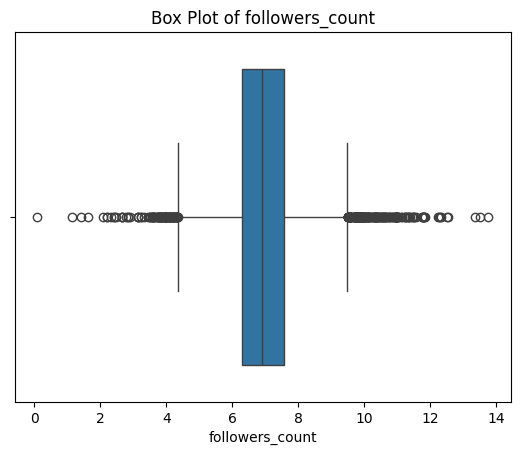

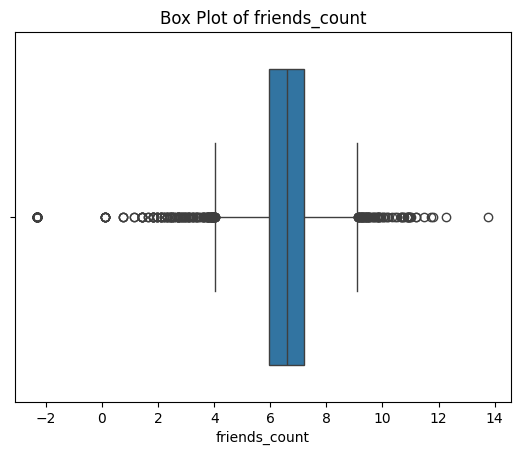

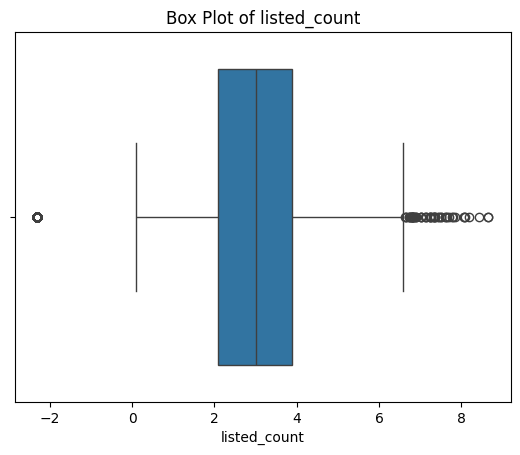

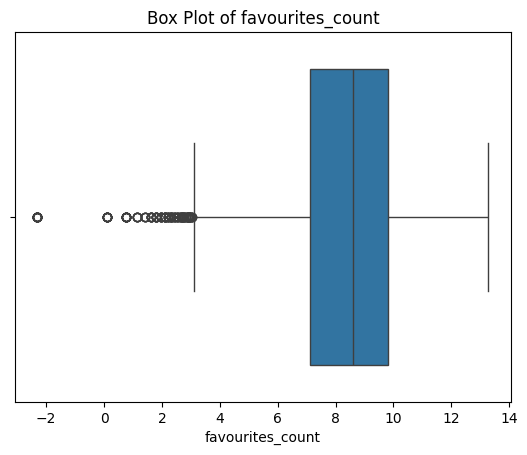

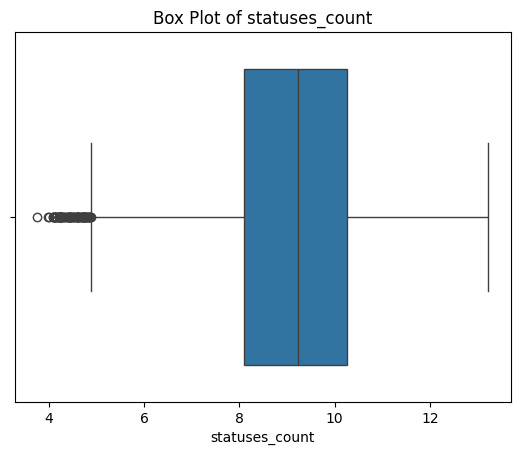

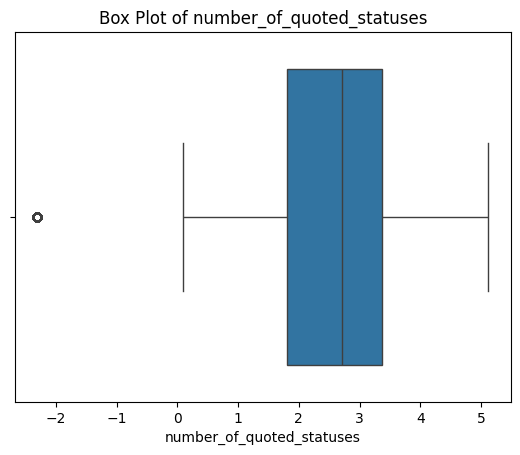

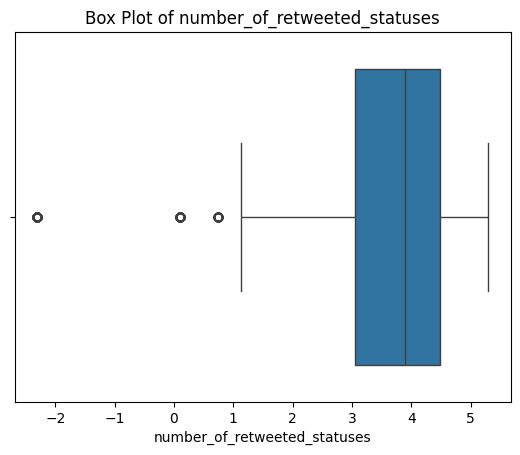

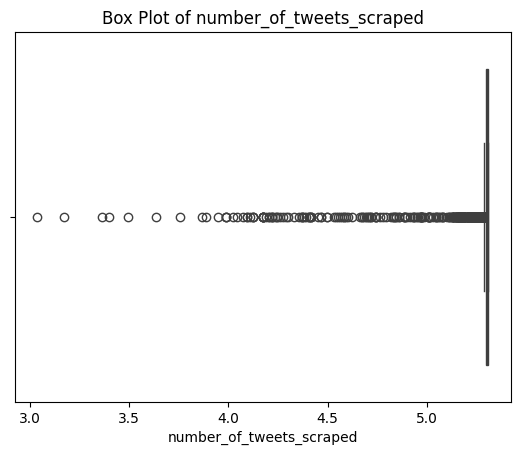

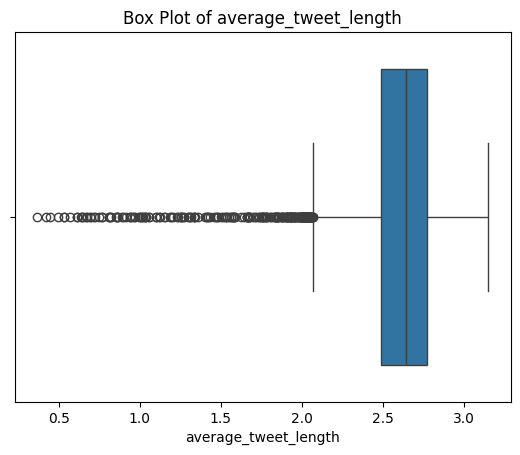

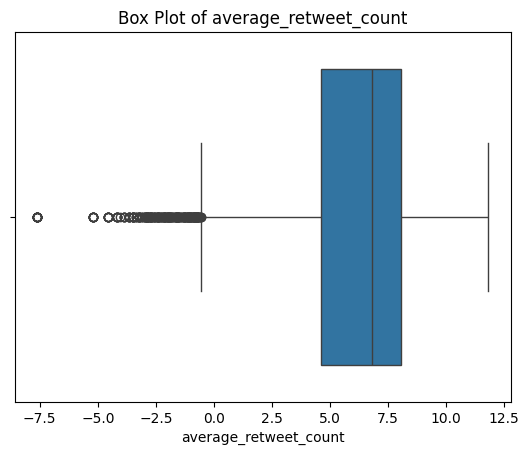

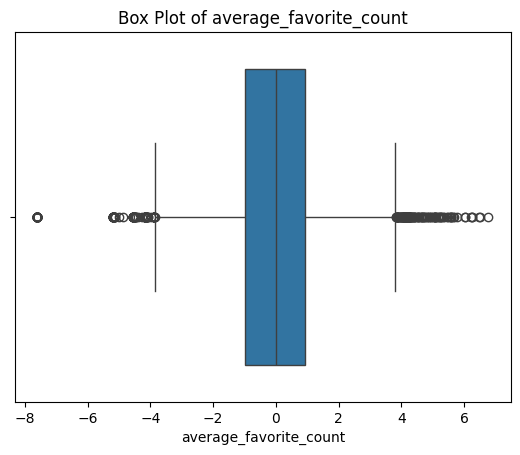

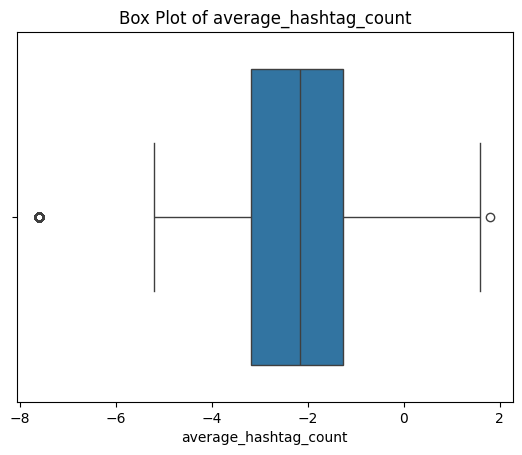

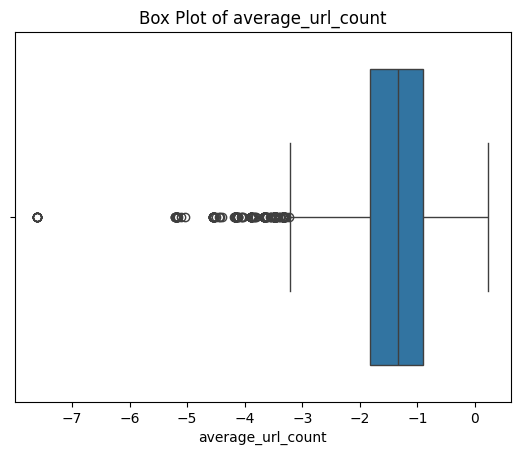

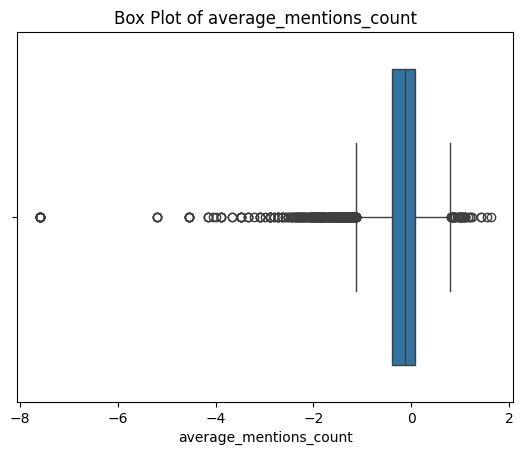

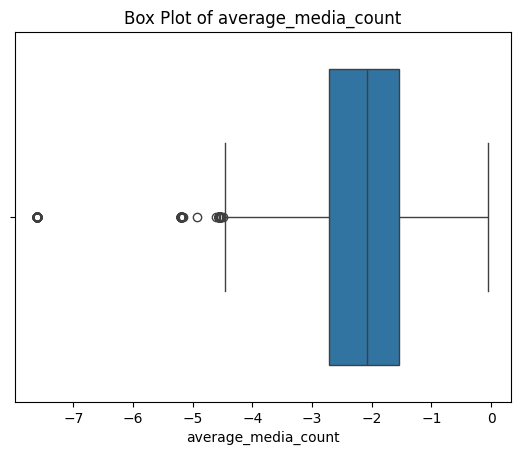

In [ ]:
for i in numerical_features_selected:
    sns.boxplot(x=X[i])
    plt.title(f'Box Plot of {i}')
    plt.show()

In [ ]:
# def numerical_scaling(df, features, scaler):
#     df[features] = scaler.fit_transform(df[features])
#     return df, scaler

In [ ]:
robust_features = []
minmax_features = numerical_features_selected
standard_features = []

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# X[robust_features] = robust_scaler.fit_transform(df[robust_features])
X[minmax_features] = minmax_scaler.fit_transform(df[minmax_features])
# X[standard_features] = standard_scaler.fit_transform(df[standard_features])

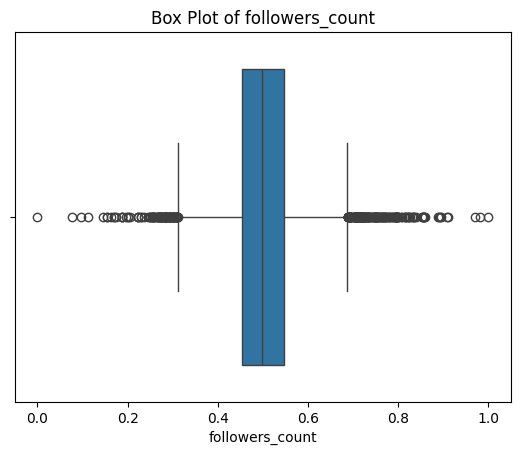

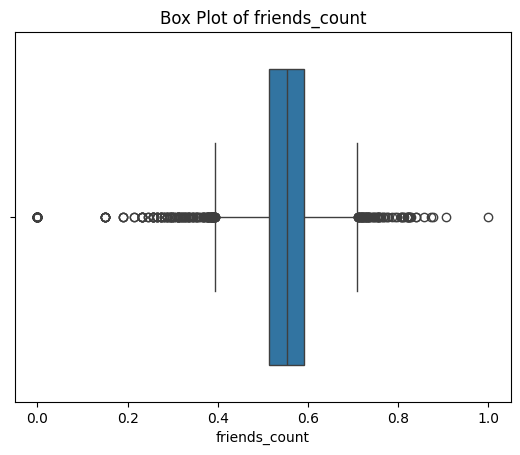

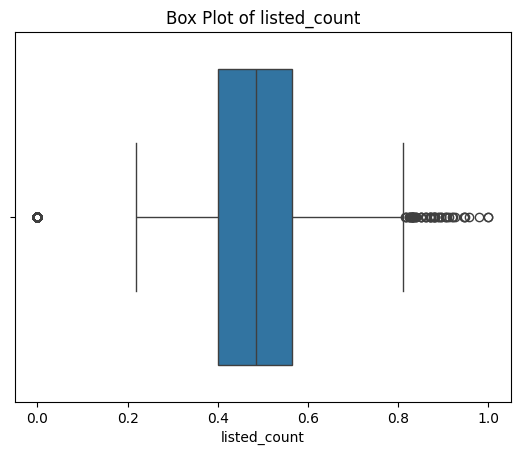

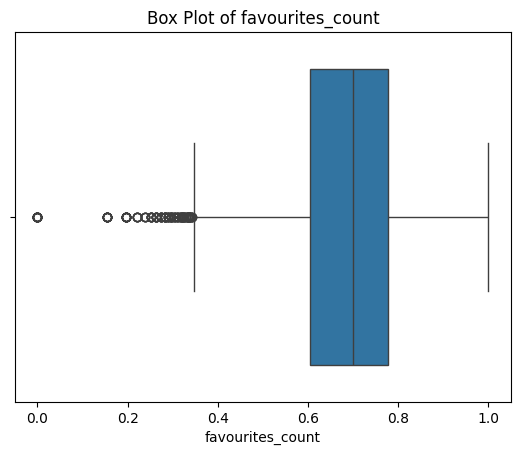

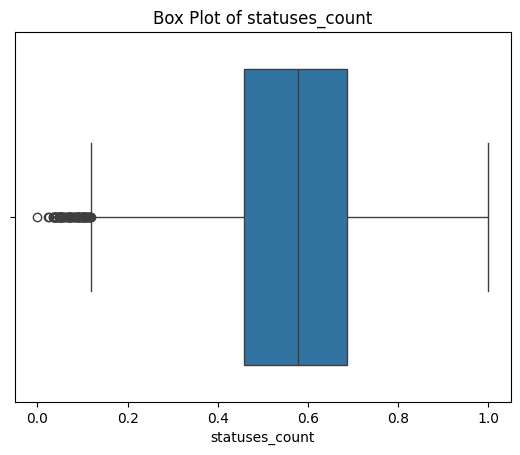

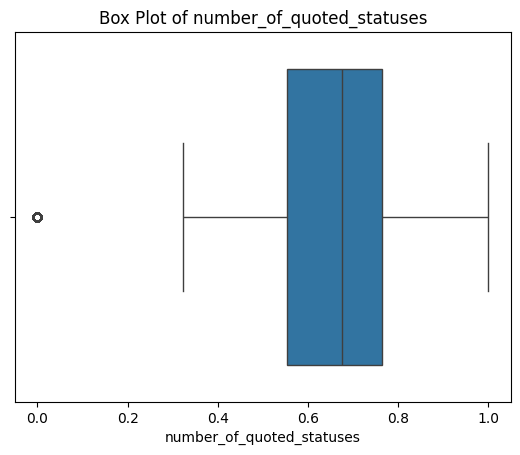

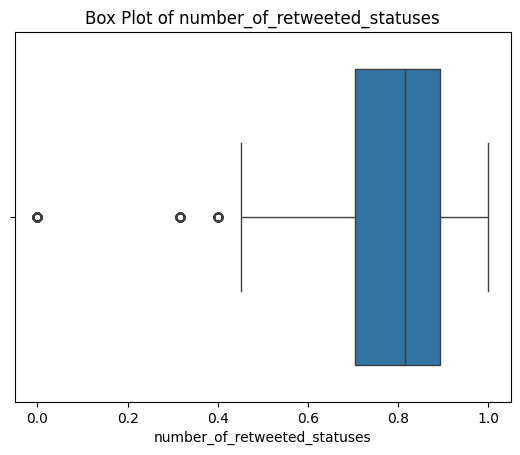

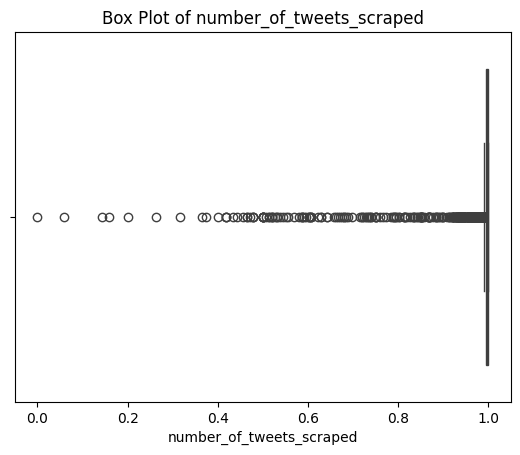

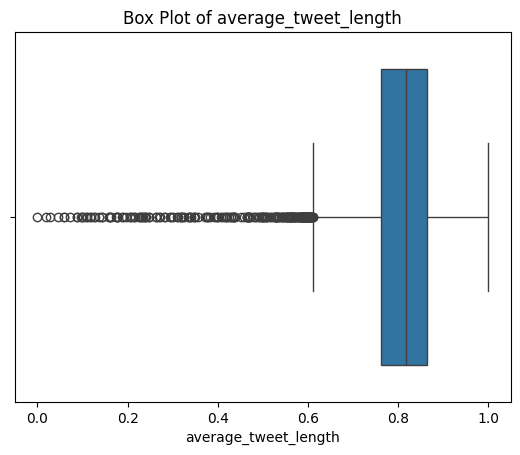

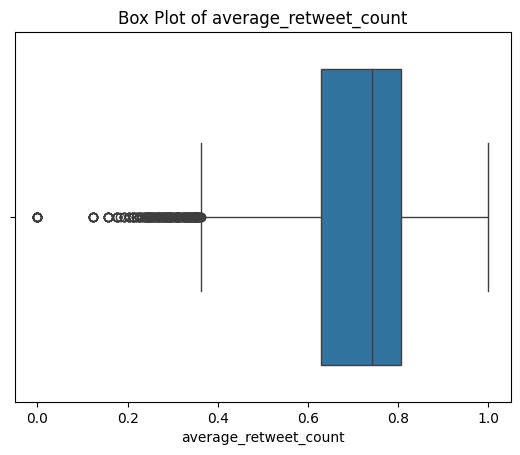

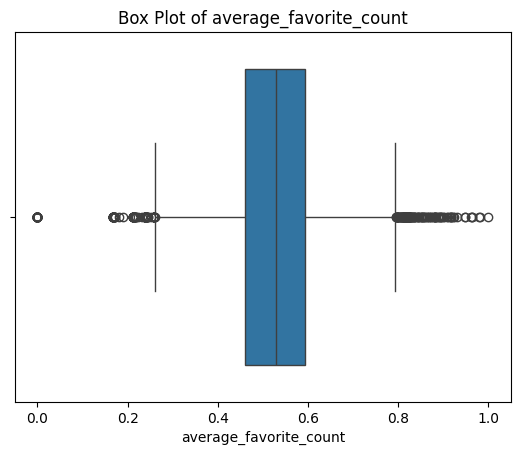

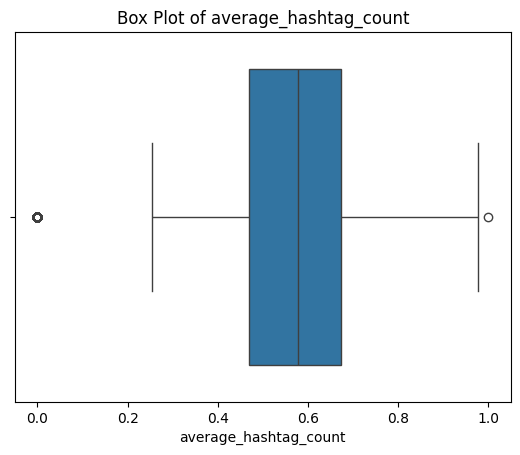

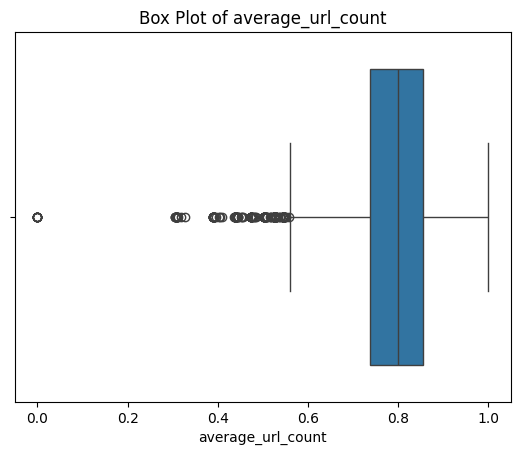

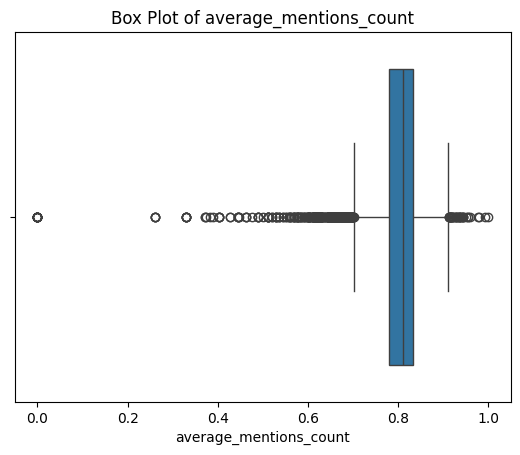

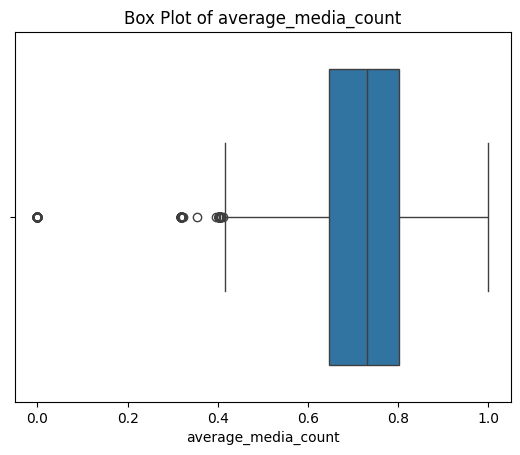

In [ ]:
for i in numerical_features_selected:
    sns.boxplot(x=X[i])
    plt.title(f'Box Plot of {i}')
    plt.show()

In [ ]:
accuracies = {}

In [ ]:
# Logistic Regression
for i in labels:
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train[i])

    Y_pred = logreg.predict(X_val)
    predictions = [round(value) for value in Y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_val[i], predictions)
    accuracies['Logistic Regression'] = accuracy* 100.0
    print(f"Label {i} - Accuracy: %.2f%%" % (accuracy * 100.0))

Label IE - Accuracy: 58.85%
Label NS - Accuracy: 74.81%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Label TF - Accuracy: 57.52%
Label JP - Accuracy: 57.94%


In [ ]:
epochs = 100
batch_size = 32
learning_rate = 1e-4

In [ ]:
for i in labels:
    model = Sequential()
    model.add(InputLayer(shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='leaky_relu'))
    model.add(Dense(128, activation='leaky_relu'))
    model.add(Dense(64, activation='leaky_relu'))
    model.add(Dense(64, activation='leaky_relu'))
    model.add(Dense(32, activation='leaky_relu'))
    model.add(Dense(32, activation='leaky_relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train[i], validation_data=(X_val, y_val[i]), epochs=epochs, batch_size=batch_size)

    # Plot the MAE during training
    train_mae = history.history['accuracy']
    val_mae = history.history['val_accuracy']

    plt.plot(train_mae, label='Training accuracy')
    plt.plot(val_mae, label='Validation accuracy')
    plt.title(f'Label f{i} Model accuracy During Training')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5019 - loss: 0.7858 - val_accuracy: 0.5504 - val_loss: 0.6865
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5648 - loss: 0.6834 - val_accuracy: 0.5654 - val_loss: 0.6842
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5512 - loss: 0.6852 - val_accuracy: 0.5565 - val_loss: 0.6830
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5606 - loss: 0.6793 - val_accuracy: 0.5604 - val_loss: 0.6826
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5621 - loss: 0.6823 - val_accuracy: 0.5593 - val_loss: 0.6868
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5687 - loss: 0.6783 - val_accuracy: 0.5765 - val_loss: 0.6809
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5877 - loss: 0.6686 - val_accuracy: 0.5793 - val_loss: 0.6815
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5887 - loss: 0.6704 - val_accu

KeyboardInterrupt: 